$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 2** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Linear and Bayesian Regression**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Aristide, Vasileios** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 23 April** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Adam Olsson Gabriel Lindeby, 950418-3170 & 951027-1779, adaols@student.chalmers.se & gablinde@student.chalmers.se** <br />

General guidelines:
* All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. 
All plots/results should be visible such that the notebook do not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.
* Your name, personal number and email address should be specified above.
* All tables and other additional information should be included in this notebook.
* ** Before submitting, make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com **

**Jupyter/IPython Notebook** is a collaborative Python web-based environment. This will be used in all our Homework Assignments. It is installed in the halls ES61-ES62, E-studio and MT9. You can also use google-colab: https://colab.research.google.com
to run these notebooks without having to download, install, or do anything on your own computer other than a browser.
Some useful resources:
1. https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/ (Quick-start guide)
2. https://www.kdnuggets.com/2016/04/top-10-ipython-nb-tutorials.html
3. http://data-blog.udacity.com/posts/2016/10/latex-primer/ (latex-primer)
4. http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html (markdown)

# [Linear Regression with regularization 11pt]

You are newly recruited as a Data Scientist at a leading consultancy company in Gothenburg. Your first task at the job is to help the Swedish Public Health Agency (folkhalsomyndigheten) for predicting the diabetes progression of patients. Assume that you are given a dataset D of $n$ patients with $D = \{ (\mathbf{x}_i, y_i)\}_{i=1}^n$ where $\mathbf{x}_i \in \mathbb{R}^p$ represents numerical features of each patients and $y_i \in \mathbb{R}$ represent the numerical diabetes progression.  One can also view the dataset D as a pair of matrices $(\mathbf{X}, \mathbf{y})$ with $\mathbf{X} \in \mathbb{R}^{n \times p}$ and $\mathbf{y} \in \mathbb{R}^{n \times 1}$.

Fresh with the lectures in the machine learning course at Chalmers, you would like to use a linear model to quickly perform the task. In order words, you would like to find a vector $\mathbf{w} \in \mathbb{R}^{p \times 1}$  such that $\mathbf{y} = \mathbf{X} \mathbf{w}$.  However,  you have just read one of the most popular machine learning book and it argues that standard linear regression (for finding $\mathbf{w}$) can lead to various problems such as non-uniqueness of the solution,  overfitting .... As a result, you decided to add a penalty term called regularization to control the optimisation problem. More specifically, you want to solve for: $\min_{\mathbf{w}}  \mathcal{L}(\mathbf{w})$ where  $\mathcal{L}(\mathbf{w}) = \left(\sum_{i=1}^n (y_i - \mathbf{w}^T\mathbf{x}_i)^2 \right) + \left(\alpha \sum_{j=1}^p w_j^2 \right) $ with $\alpha \in \mathbb{R}$ a small coefficient that you will decide later on.

1-  **1pt** Write down $\mathcal{L}(\mathbf{w})$ in matrix/vector forms using only $\mathbf{X}$, $\mathbf{y}$ and $\mathbf{w}$ and the L2 norm. In other words, you are not allowed to use any components $y_i, \mathbf{w}_j$ or $\mathbf{x}_i$ ( For any vector $\mathbf{z}$ use the following notation $|\mathbf{z}|_2$ to mean the L2 norm of $\mathbf{z}$ See http://mathworld.wolfram.com/L2-Norm.html for more information about the L2 norm.)

$L(w) = (\mathbf{y}-\mathbf{X}\mathbf{w})^T(\mathbf{y}-\mathbf{X}\mathbf{w}) + \alpha \mathbf{w}^T\mathbf{w}$

2- **1pt** Derive and write down in matrix/vector forms the gradient of $\mathcal{L}(\mathbf{w})$ with respect to $\mathbf{w}$. Show all the derivations. (Hint: You can start by  computing the gradient of the full expression and then convert it to matrix/vector forms. You can also directly get the gradients from your answer in 1-)

$L(w) = (\mathbf{y}-\mathbf{X}\mathbf{w})^T(\mathbf{y}-\mathbf{X}\mathbf{w}) + \alpha \mathbf{w}^T\mathbf{w} = $

$(\mathbf{y}^T-(\mathbf{X}\mathbf{w})^T)(\mathbf{y}-\mathbf{X}\mathbf{w}) + \alpha \mathbf{w}^T\mathbf{w} = $

$ \mathbf{y}^T\mathbf{y} - \mathbf{y}^T\mathbf{X}\mathbf{w} - (\mathbf{X}\mathbf{w})^T\mathbf{y} + (\mathbf{X}\mathbf{w})^T\mathbf{X}\mathbf{w} + \alpha \mathbf{w}^T\mathbf{w} = $

$ \mathbf{y}^T\mathbf{y} - (\mathbf{X}\mathbf{w})^T\mathbf{y} - (\mathbf{X}\mathbf{w})^T\mathbf{y} + (\mathbf{X}\mathbf{w})^T\mathbf{X}\mathbf{w} + \alpha \mathbf{w}^T\mathbf{w} = $

$ \mathbf{y}^T\mathbf{y} - 2(\mathbf{X}\mathbf{w})^T\mathbf{y} + (\mathbf{X}\mathbf{w})^T\mathbf{X}\mathbf{w} + \alpha \mathbf{w}^T\mathbf{w} = $

$ \mathbf{y}^T\mathbf{y} - 2\mathbf{w}^T\mathbf{X}^T\mathbf{y} + \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} + \alpha \mathbf{w}^T\mathbf{w}$

Taking the partial derivative of each term with respect to $\mathbf{w}$

$\frac{\partial \mathbf{y}^T\mathbf{y}}{\partial \mathbf{w}} = 0$

$\frac{\partial 2\mathbf{w}^T\mathbf{X}^T\mathbf{y}}{\partial \mathbf{w}} = 2\mathbf{X}^T\mathbf{y}$

$\frac{\partial \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}}{\partial \mathbf{w}} = 2\mathbf{X}^T\mathbf{X}\mathbf{w}$

$\frac{\partial \alpha \mathbf{w}^T\mathbf{w}}{\partial \mathbf{w}} = 2\alpha \mathbf{w}$

$\frac{\partial L(w)}{\partial w} = 2\mathbf{X}^T\mathbf{X}\mathbf{w} - 2\mathbf{X}^T\mathbf{y} + 2\alpha \mathbf{w}$

3- **2pt** Derive and write down in matrix/vector forms the solution $\mathbf{w}^*$ to the optimization problem $\min_{\mathbf{w}}  \mathcal{L}(\mathbf{w})$. Show all your derivations. (Hint: $\mathcal{L}(\mathbf{w})$ is convex in $\mathbf{w}$)

$\mathbf{I} =$ Identity matrix of size $p$ by $p$

$2\mathbf{X}^T\mathbf{X}\mathbf{w} - 2\mathbf{X}^T\mathbf{y} + 2\alpha \mathbf{w} = 0$

$\mathbf{X}^T\mathbf{X}\mathbf{w} + \alpha \mathbf{w} = \mathbf{X}^T\mathbf{y}$

$(\mathbf{X}^T\mathbf{X} + \alpha \mathbf{I}) \mathbf{w} = \mathbf{X}^T\mathbf{y}$

$\mathbf{w^{*}} = (\mathbf{X}^T\mathbf{X} + \alpha \mathbf{I})^{-1} \mathbf{X}^T\mathbf{y}$

4-  **2pt** Under which condition on the $\alpha$ is the solution $\mathbf{w}^*$ unique? Prove rigorously your statement. Make no assumptions on $\mathbf{X}$. (Hint: If your solution $\mathbf{w}^*$ requires to invert a matrix, then one necessary condition for uniquess is for the matrix to be invertible. And any positive definitive matrix https://en.wikipedia.org/wiki/Definiteness_of_a_matrix is invertible. You might also want to look at the properties of transposition https://en.wikipedia.org/wiki/Transpose)

5- **2pt** Implement in Python a well commented function **fit_linear_with_regularization** that takes as input $\mathbf{X}$, $\mathbf{y}$ and $\alpha$ and return $\mathbf{w}^*$ as computed in question 3. You are not allowed to use any loops (for-loop, while-loop ...) to do the implementation. Instead use and abuse as much as possible numpy vectorization techniques. A skeleton of the function is shown in the code cell below.

6- **3pt** Implement in Python a well commented function **predict** that takes as input a dataset $\mathbf{X_{\text{test}}}$ in the same dimensions as $\mathbf{X}$ and return the predictions.   Write down the mean squared error (https://en.wikipedia.org/wiki/Mean_squared_error) of your predictions. Then on the same plot with legends, show:

 a) A scatter plot of the first feature of $\mathbf{X_{\text{test}}}$ (x-axis) and the diabetes progression $\mathbf{y_{\text{test}}}$ 
 
 b) A plot of your prediction for $\mathbf{X_{\text{test}}}$
 
 The skeleton code in the cell below already implements most of data loading and you should only have to fill in the *TODO* part. Again here no loops are allowed (for-loop, while loop in the implementation of the plots and the **predict** )
 
 **Bonus question**
 
In the code from the cell below, we use alpha = 0.01. If you want, you could check if you can improve the mean squared error by using a different value of strictly positive alpha  and/or by normalizing the input features $\mathbf{X}$. 

Finding this improvement, will not give you any additional points. Not finding an improvement  will not prevent you from getting full points (if all questions with points are answered correctly). However, if you find an improvement, we will pick exactly one question where you didn't receive full points in this assignment and give you full points there. In particular,  between the questions for which you have reasonably attempted a solution, we will pick the one where the difference between the full point and the point you received is the maximum.

**Answer:** Using alpha = 0.004 gave a MSE of 2001.88 where the original alpha = 0.01 gave a MSE of 2003.88. We have found a better value of alpha.





Mean Squared error is  2001.8896226596742


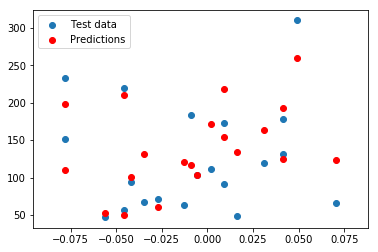

In [37]:
# Make it possible to show plots in the notebooks.
%matplotlib inline
import numpy as np
from numpy.linalg import inv
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt

def fit_linear_with_regularization(X, y, alpha):
    """w* = (X^T*X + alpha*I)^-1*X^T*y"""
    (n, p) = X.shape # Get the number of features for the identity matrix
    
    X1 = np.append(np.ones((n,1)), X, axis=1) # Append a 1 for keeping w0
    
    Xt = np.transpose(X1)
    I = np.identity(p+1)
    I[0,0] = 0 # avoid doing regularization on w0
    
    return np.dot(np.dot(inv(np.dot(Xt,X1) + alpha*I),Xt),y)

def predict(X_test, w):
    """Do the prediction of each data instance. Function returns a vector of size n predictions"""
    (n, p) = X_test.shape
    X1 = np.append(np.ones((n,1)), X_test, axis=1)
    
    return np.dot(X1, w)

def plot_prediction(X_test, y_test, y_pred):
    """Plots the first features and the scatter plot of the predictions"""
    # Scatter plot the first feature of X_test (x-axis) and y_test (y-axis)
    plt.scatter(X_test[:,0], y_test, label='Test data')

    # Plot y_pred using the first feature of X_test as x-axis
    plt.scatter(X_test[:,0], y_pred, color='red', label='Predictions')
    
    plt.legend()
    
    # Compute the mean squared error
    mean_squared_error = np.dot(np.transpose(y_test - y_pred),y_test - y_pred)/X_test.shape[0]
    return mean_squared_error

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)


# Split the dataset into training and test set
num_test_elements = 20

X_train = X[:-num_test_elements]
X_test = X[-num_test_elements:]

y_train = y[:-num_test_elements]
y_test = y[-num_test_elements:]

# Set alpha
# original alpha = 0.01, better mean squared error reached with alpha = 0.004
alpha = 0.004

# Train using linear regression with regularization and find optimal model
w = fit_linear_with_regularization(X_train, y_train, alpha)

# Make predictions using the testing set X_test
y_pred = predict(X_test, w)

# Plots and mean squared error
error = plot_prediction(X_test, y_test, y_pred)
print('Mean Squared error is ', error)

# Show the plot
plt.show();

# Bayesian Linear Regression   4pt

Proud of finishing the task using a linear model with regularization, you show your results to a representative of the Swedish Public Health Agency. You barely finish explaining your solution when the face of the representative turns red and you could distinctly hear: "Bayesian is the only way: How come didn't you use any probabilities?". 

You quickly head back to your desk and now assume a Gaussian prior on the solution $\mathbf{w}$, that is $p(\mathbf{w}) = \mathcal{N}(\mathbf{0}, \lambda^{-1} \mathbf{I})$ where $\lambda \in \mathbb{R}$ is a constant real number, $I$ is the $p \times p$ identity matrix and $\mathcal{N}(\mathbf{0}, \lambda^{-1} \mathbf{I})$ is used to mean the multivariate gaussian distribution with mean $\mathbf{0} \in \mathbb{R}^p$ , a vector of zeros of dimension $p$ and covariance matrix $\lambda^{-1} \mathbf{I}$ . Then, you use the following likelihood:

$p(\mathbf{y} | \mathbf{X}, \mathbf{w}) = \prod_{i=1}^n \mathcal{N}(\mathbf{w}^T \mathbf{x}_i, \gamma^{-1})$ where here $\gamma \in \mathbb{R}$ is a constant real number and $\mathcal{N}(\mathbf{w}^T \mathbf{x}_i, \gamma^{-1})$ is the gaussian distribution with mean  $\mathbf{w}^T \mathbf{x}_i$ and variance $\gamma^{-1}$.


7- **2pt** Derive and express in vector/matrix form as a function of $\mathbf{X}, \mathbf{y}, \mathbf{w}$ the log posterior $\ln p(\mathbf{w} | \mathbf{y}, \mathbf{X})$. Show all the derivations. You can ignore normalizing constants.
 
$p(w) = N(0, \lambda^{-1}I)$

$p(y \mid \mathbf{X}, \mathbf{w}) = \prod_{i=1}^{n} N(\mathbf{w}^T\mathbf{x}_{i}, \gamma^{-1})$  

Since the prior and likelihood are conjugate we know the posterior will have the same distribution as the prior (Gaussian). This means that we can ignore the normalizing distribution. We then get the expression:

$p(w \mid \mathbf{y},\mathbf{X}) = p(\mathbf{w}) p(\mathbf{y} \mid \mathbf{X}, \mathbf{w}) = $
$ N(0, \lambda^{-1}I)\prod_{i=1}^{n} N(\mathbf{w}^T\mathbf{x}_{i}, \gamma^{-1})$

If we take the natural logarithm of $p(w \mid \mathbf{y},\mathbf{X})$ and ignore the terms not containing $\mathbf{w}$ we get:

$ln(p(w \mid \mathbf{y},\mathbf{X})) = -\frac{1}{2}(\mathbf{w} - 0)^T(\lambda^{-1}\mathbf{I})^{-1}(\mathbf{w} - 0) - \frac{1}{2}\sum_{i=1}^{n}(y_i-\mathbf{w}^Tx_i)^T \gamma^{-1}(y_i-\mathbf{w}^Tx_i) = $

$-\frac{1}{2}\mathbf{w}^T(\lambda^{-1}\mathbf{I})^{-1}\mathbf{w} - \frac{1}{2\gamma}(\mathbf{y} -\mathbf{X}\mathbf{w})^T(\mathbf{y} -\mathbf{X}\mathbf{w})$

$(\lambda^{-1}\mathbf{I})^{-1} = (\lambda^{-1})^{-1}\mathbf{I}^{-1} = \lambda \mathbf{I}$

$-\frac{1}{2}\mathbf{w}^T(\lambda \mathbf{I})\mathbf{w} - \frac{1}{2\gamma}(\mathbf{y} -\mathbf{X}\mathbf{w})^T(\mathbf{y} -\mathbf{X}\mathbf{w})$

We can rewrite $\mathbf{w}^T(\lambda \mathbf{I})\mathbf{w}$ to $\lambda \mathbf{w}^T\mathbf{w}$ because of:


  \begin{equation}
    \mathbf{w}^T \lambda \mathbf{I} \mathbf{w} =  
        \begin{bmatrix}
            w_0 & w_1 & \dots & w_p
        \end{bmatrix}
        \begin{bmatrix}
            \lambda & 0        & \dots   &  0     \\
             0      & \lambda  & \dots   &  0     \\
            \vdots  & 0        & \vdots  & \vdots \\
                    &  \vdots  &         &  0     \\
              0     &  0       &         & \lambda
        \end{bmatrix}
        \begin{bmatrix}
            w_0 \\ w_1 \\ \dots \\ w_p
        \end{bmatrix} = 
        \lambda w_0^2 + \lambda w_1^2 + \dots + \lambda w_p^2 =
        \lambda(w_0^2 + w_1^2 + \dots + w_p^2)
  \end{equation}

Finally we get the expressions:

$ln(p(w \mid \mathbf{y},\mathbf{X})) = -\frac{\lambda}{2}\mathbf{w}^T\mathbf{w} - \frac{1}{2\gamma}(\mathbf{y} -\mathbf{X}\mathbf{w})^T(\mathbf{y} -\mathbf{X}\mathbf{w})$

8-  **2pt** Show that maximizing the posterior in 7- is  similar to minimizing the function $\mathcal{L}(\mathbf{w})$ seen in the previous section. Show your derivations. (Note: You should show this without computing the maximum of the posterior. Instead, you should express the log posterior in term of $\mathcal{L}(\mathbf{w})$, ignoring constants if necessary. Then find the $\alpha$ of $\mathcal{L}(\mathbf{w})$ in term of $\lambda$ and $\gamma$).

Multiplying a function with a constant won't affect the location of its maximum or minimum, it will only affect its value. We show that maximizing the posterior is the same thing as minimizing the $\mathcal{L}(\mathbf{w})$ by:

max $ln(p(w \mid \mathbf{y},\mathbf{X}))$ = min $-ln(p(w \mid \mathbf{y},\mathbf{X})) =$ min  $\frac{\lambda}{2}\mathbf{w}^T\mathbf{w} + \frac{1}{2\gamma}(\mathbf{y} -\mathbf{X}\mathbf{w})^T(\mathbf{y} -\mathbf{X}\mathbf{w})$ 

As we just mentioned, we can multiply the posterior by a constant to and still not affect the location of its optimum. We multiply the posterior by $2\gamma$:

min $-2\gamma ln(p(w \mid \mathbf{y},\mathbf{X})) = \frac{\lambda}{\gamma}\mathbf{w}^T\mathbf{w} + (\mathbf{y} -\mathbf{X}\mathbf{w})^T(\mathbf{y} -\mathbf{X}\mathbf{w})$

Rearranging and we get:

min $-2\gamma ln(p(w \mid \mathbf{y},\mathbf{X})) = (\mathbf{y} -\mathbf{X}\mathbf{w})^T(\mathbf{y} -\mathbf{X}\mathbf{w}) + \frac{\lambda}{\gamma}\mathbf{w}^T\mathbf{w}$

Which is very similar to our $\mathcal{L}(\mathbf{w})$ in previous section. Therefor we see that maximizing the posterior in 7- is similar to minimizing $\mathcal{L}(\mathbf{w})$. If we would define $\alpha = \frac{\lambda}{\gamma}$ we would have exactly the same expression. 
